#IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# NEW LIBRARY TO LEARN TODAY
import pickle
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Step Building Prospensity Model

## 1. Decide Objective From Propspensity Model
### Predict wheter customer will churn or not

## 2. Data Preparation

In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1nRz-r26BrXClbvukovu5vK3VbDrrkkXZ/edit#gid=437604101'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')


df_dataset = pd.read_csv(GSHEET_URL_CSV)
df_dataset.head(5)

,id,is_tv_subscriber,is_movie_subscriber,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,is_contract,remaining_contract_month,MOB,Type Customer,churn
0,15,1,0,25.0,0.0,8.40,2.3,0.0,1,1.7,143.40,Internet & TV Cable,0
1,18,0,0,0.0,0.0,0.00,0.0,0.0,0,NaN,98.64,Internet Only,1
2,23,1,0,16.0,0.0,13.70,0.9,0.0,1,0.0,106.92,Internet & TV Cable,1
3,27,0,0,21.0,1.0,0.00,0.0,0.0,0,NaN,82.44,Internet Only,1
4,34,0,0,0.0,0.0,0.00,0.0,0.0,0,NaN,76.68,Internet Only,1


In [ ]:
# Rename the 'churn' column to 'target'
df_dataset.rename(columns={'churn': 'target'}, inplace=True)
# Rename the Type Customer to type_customer
df_dataset.rename(columns={'Type Customer': 'type_customer'}, inplace=True)

# Display the DataFrame with the updated column name
print("\nDataFrame with Updated Column Name:")
print(df_dataset)


DataFrame with Updated Column Name:
            id  is_tv_subscriber  is_movie_subscriber  bill_avg  \
0           15                 1                    0      25.0   
1           18                 0                    0       0.0   
2           23                 1                    0      16.0   
3           27                 0                    0      21.0   
4           34                 0                    0       0.0   
...        ...               ...                  ...       ...   
71888  1689679                 1                    0       0.0   
71889  1689733                 0                    0       0.0   
71890  1689744                 1                    1       0.0   
71891    65522                 0                    1       0.0   
71892   974569                 0                    1      28.0   

       service_failure_count download_avg  upload_avg  download_over_limit  \
0                        0.0         8.40         2.3                  0.0   
1 

In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71893 entries, 0 to 71892
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        71893 non-null  int64  
 1   is_tv_subscriber          71893 non-null  int64  
 2   is_movie_subscriber       71893 non-null  int64  
 3   bill_avg                  71893 non-null  float64
 4   service_failure_count     71893 non-null  float64
 5   download_avg              71893 non-null  object 
 6   upload_avg                71893 non-null  float64
 7   download_over_limit       71893 non-null  float64
 8   is_contract               71893 non-null  int64  
 9   remaining_contract_month  50375 non-null  float64
 10  MOB                       71893 non-null  float64
 11  type_customer             71893 non-null  object 
 12  target                    71893 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 7.1+ MB


In [ ]:
df_dataset['remaining_contract_month'] = df_dataset['remaining_contract_month'].fillna(0)

In [ ]:
# Chek wheter data still has null coloumn or not
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71893 entries, 0 to 71892
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        71893 non-null  int64  
 1   is_tv_subscriber          71893 non-null  int64  
 2   is_movie_subscriber       71893 non-null  int64  
 3   bill_avg                  71893 non-null  float64
 4   service_failure_count     71893 non-null  float64
 5   download_avg              71893 non-null  object 
 6   upload_avg                71893 non-null  float64
 7   download_over_limit       71893 non-null  float64
 8   is_contract               71893 non-null  int64  
 9   remaining_contract_month  71893 non-null  float64
 10  MOB                       71893 non-null  float64
 11  type_customer             71893 non-null  object 
 12  target                    71893 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 7.1+ MB


In [ ]:
# And let's keep only essential informations in the dataset
# We typically only interested in numeric and categorical data
df_dataset2 = df_dataset[['id','bill_avg','service_failure_count','download_avg','upload_avg','download_over_limit', 'is_contract',
                          'remaining_contract_month','MOB','type_customer','target']].copy()
df_dataset2


,id,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,is_contract,remaining_contract_month,MOB,type_customer,target
0,15,25.0,0.0,8.40,2.3,0.0,1,1.7,143.40,Internet & TV Cable,0
1,18,0.0,0.0,0.00,0.0,0.0,0,0.0,98.64,Internet Only,1
2,23,16.0,0.0,13.70,0.9,0.0,1,0.0,106.92,Internet & TV Cable,1
3,27,21.0,1.0,0.00,0.0,0.0,0,0.0,82.44,Internet Only,1
4,34,0.0,0.0,0.00,0.0,0.0,0,0.0,76.68,Internet Only,1
...,...,...,...,...,...,...,...,...,...,...,...
71888,1689679,0.0,0.0,1.50,0.2,0.0,1,26.3,0.24,Internet & TV Cable,1
71889,1689733,0.0,0.0,0.00,0.0,0.0,1,8.6,0.12,Internet Only,1
71890,1689744,0.0,0.0,0.00,0.0,0.0,1,9.8,0.12,Complete Package,1
71891,65522,0.0,0.0,0.00,0.0,4.0,0,0.0,31.32,Internet & Movie,1


In [ ]:
df_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71893 entries, 0 to 71892
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        71893 non-null  int64  
 1   bill_avg                  71893 non-null  float64
 2   service_failure_count     71893 non-null  float64
 3   download_avg              71893 non-null  object 
 4   upload_avg                71893 non-null  float64
 5   download_over_limit       71893 non-null  float64
 6   is_contract               71893 non-null  int64  
 7   remaining_contract_month  71893 non-null  float64
 8   MOB                       71893 non-null  float64
 9   type_customer             71893 non-null  object 
 10  target                    71893 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 6.0+ MB


In [ ]:
## change  download avg from string to float (Tidak dapat menggunakan astype maka harus direplace dulu utuk komanya)
df_dataset2['download_avg'] = df_dataset2['download_avg'].apply(lambda x: float(x.replace(',', '')))


In [ ]:
df_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71893 entries, 0 to 71892
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        71893 non-null  int64  
 1   bill_avg                  71893 non-null  float64
 2   service_failure_count     71893 non-null  float64
 3   download_avg              71893 non-null  float64
 4   upload_avg                71893 non-null  float64
 5   download_over_limit       71893 non-null  float64
 6   is_contract               71893 non-null  int64  
 7   remaining_contract_month  71893 non-null  float64
 8   MOB                       71893 non-null  float64
 9   type_customer             71893 non-null  object 
 10  target                    71893 non-null  int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 6.0+ MB


## 3. Feature Engineering

### Encoding categorical variables

In [ ]:
label_column = ['target']
categorical_columns = df_dataset2.select_dtypes(include='object').columns.to_list()
df_dataset2[categorical_columns].value_counts()

type_customer       
Internet & TV  Cable    34594
Complete  Package       24015
Internet Only           13282
Internet & Movie            2
dtype: int64

In [ ]:
propensity2 = df_dataset2.copy()
propensity2 = pd.get_dummies(propensity2, columns=categorical_columns, drop_first= False)
propensity2

,id,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,is_contract,remaining_contract_month,MOB,target,type_customer_Complete Package,type_customer_Internet & Movie,type_customer_Internet & TV Cable,type_customer_Internet Only
0,15,25.0,0.0,8.4,2.3,0.0,1,1.7,143.40,0,0,0,1,0
1,18,0.0,0.0,0.0,0.0,0.0,0,0.0,98.64,1,0,0,0,1
2,23,16.0,0.0,13.7,0.9,0.0,1,0.0,106.92,1,0,0,1,0
3,27,21.0,1.0,0.0,0.0,0.0,0,0.0,82.44,1,0,0,0,1
4,34,0.0,0.0,0.0,0.0,0.0,0,0.0,76.68,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71888,1689679,0.0,0.0,1.5,0.2,0.0,1,26.3,0.24,1,0,0,1,0
71889,1689733,0.0,0.0,0.0,0.0,0.0,1,8.6,0.12,1,0,0,0,1
71890,1689744,0.0,0.0,0.0,0.0,0.0,1,9.8,0.12,1,1,0,0,0
71891,65522,0.0,0.0,0.0,0.0,4.0,0,0.0,31.32,1,0,1,0,0


In [ ]:
# change is_contract to uint
propensity2['is_contract'] =propensity2 ['is_contract'].astype(np.uint8)


In [ ]:
propensity2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71893 entries, 0 to 71892
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  71893 non-null  int64  
 1   bill_avg                            71893 non-null  float64
 2   service_failure_count               71893 non-null  float64
 3   download_avg                        71893 non-null  float64
 4   upload_avg                          71893 non-null  float64
 5   download_over_limit                 71893 non-null  float64
 6   is_contract                         71893 non-null  uint8  
 7   remaining_contract_month            71893 non-null  float64
 8   MOB                                 71893 non-null  float64
 9   target                              71893 non-null  int64  
 10  type_customer_Complete  Package     71893 non-null  uint8  
 11  type_customer_Internet & Movie      71893

In [ ]:
# Set id as index of the propensity2
propensity2 = propensity2.set_index('id')
propensity2

,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,is_contract,remaining_contract_month,MOB,target,type_customer_Complete Package,type_customer_Internet & Movie,type_customer_Internet & TV Cable,type_customer_Internet Only
id,,,,,,,,,,,,,
15,25.0,0.0,8.4,2.3,0.0,1,1.7,143.40,0,0,0,1,0
18,0.0,0.0,0.0,0.0,0.0,0,0.0,98.64,1,0,0,0,1
23,16.0,0.0,13.7,0.9,0.0,1,0.0,106.92,1,0,0,1,0
27,21.0,1.0,0.0,0.0,0.0,0,0.0,82.44,1,0,0,0,1
34,0.0,0.0,0.0,0.0,0.0,0,0.0,76.68,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689679,0.0,0.0,1.5,0.2,0.0,1,26.3,0.24,1,0,0,1,0
1689733,0.0,0.0,0.0,0.0,0.0,1,8.6,0.12,1,0,0,0,1
1689744,0.0,0.0,0.0,0.0,0.0,1,9.8,0.12,1,1,0,0,0


## 4. Split into TRAINing and TEST sample


In [ ]:
#Now we ready to split the dataset into train and test sample.

#- Train : 70% --> dipake untuk membuat model
#- Test : 30% --> dipake untuk mengecek accuracy / F1Score/ dll dari model tsb

In [ ]:
feature_columns = set(propensity2.columns) - set(label_column) # atau variable x
feature_columns = sorted(feature_columns)
feature_columns

['MOB',
 'bill_avg',
 'download_avg',
 'download_over_limit',
 'is_contract',
 'remaining_contract_month',
 'service_failure_count',
 'type_customer_Complete  Package',
 'type_customer_Internet & Movie',
 'type_customer_Internet & TV  Cable',
 'type_customer_Internet Only',
 'upload_avg']

In [ ]:
label_column

['target']

In [ ]:
features = propensity2[feature_columns].copy()
label = propensity2[label_column].copy()


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 15 to 974569
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MOB                                 71893 non-null  float64
 1   bill_avg                            71893 non-null  float64
 2   download_avg                        71893 non-null  float64
 3   download_over_limit                 71893 non-null  float64
 4   is_contract                         71893 non-null  uint8  
 5   remaining_contract_month            71893 non-null  float64
 6   service_failure_count               71893 non-null  float64
 7   type_customer_Complete  Package     71893 non-null  uint8  
 8   type_customer_Internet & Movie      71893 non-null  uint8  
 9   type_customer_Internet & TV  Cable  71893 non-null  uint8  
 10  type_customer_Internet Only         71893 non-null  uint8  
 11  upload_avg                          718

In [ ]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 15 to 974569
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  71893 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [ ]:
# Split into training and test dataset
# x_training, x_test, y_training, y_test = train_test_split(features,label,test_size = 0.3, random_state=239856293)

x_training, x_test, y_training, y_test = train_test_split(features, label, test_size= 0.3,  random_state=1000)

In [ ]:
 for df in [x_training, x_test, y_training, y_test]:
   print(df.shape)

(50325, 12)
(21568, 12)
(50325, 1)
(21568, 1)


In [ ]:
print(x_training.shape)
print(x_test.shape)
print(y_training.shape)
print(y_test.shape)

(50325, 12)
(21568, 12)
(50325, 1)
(21568, 1)


In [ ]:
x_training

,MOB,bill_avg,download_avg,download_over_limit,is_contract,remaining_contract_month,service_failure_count,type_customer_Complete Package,type_customer_Internet & Movie,type_customer_Internet & TV Cable,type_customer_Internet Only,upload_avg
id,,,,,,,,,,,,
1181621,24.96,24.0,93.0,0.0,1,22.4,2.0,1,0,0,0,7.2
1009933,35.16,12.0,57.9,0.0,1,11.9,0.0,1,0,0,0,4.0
1643538,1.44,11.0,5.9,0.0,1,22.2,0.0,0,0,1,0,0.7
111134,22.32,13.0,0.0,0.0,0,0.0,2.0,0,0,0,1,0.0
1619263,2.16,20.0,68.5,0.0,1,12.4,3.0,0,0,1,0,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1378195,21.48,13.0,0.0,0.0,1,5.2,0.0,0,0,1,0,0.0
440507,74.76,18.0,74.5,0.0,1,21.6,0.0,1,0,0,0,3.8
86961,44.40,21.0,14.8,0.0,0,0.0,1.0,0,0,0,1,1.2


In [ ]:
# Let's combine training and test data in 1 df
training = pd.concat([x_training, y_training], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [ ]:
print(training.shape)
print(test.shape)

(50325, 13)
(21568, 13)


## 5. Exploratory Data Analysis on Training Data

##### Target check using heatmap

Baik Data training dan data testing mempunyai distribusi churn yang cukup balance

[Text(0, 0, '0.556165'), Text(0, 0, '0.443835')]

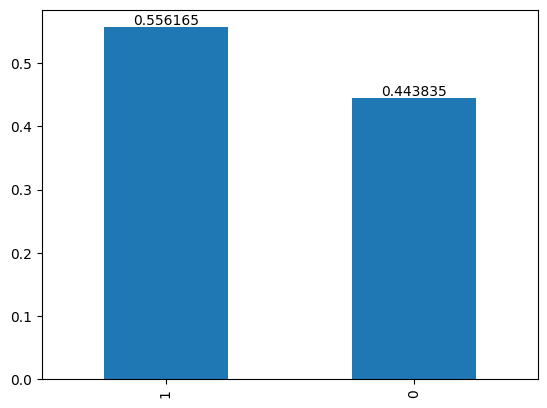

In [ ]:
# Training
ax = training['target'].value_counts(normalize=True).plot(kind='bar')
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.559208'), Text(0, 0, '0.440792')]

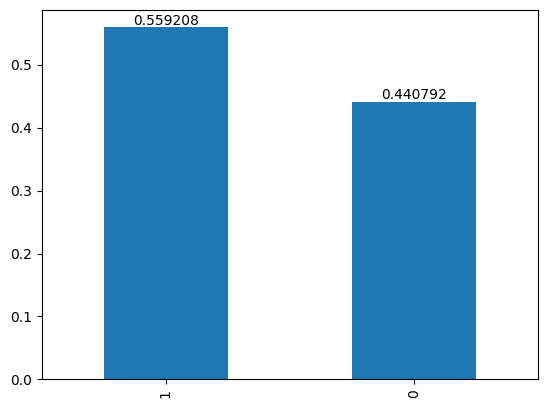

In [ ]:
# Test
ax = test['target'].value_counts(normalize=True).plot(kind='bar')
ax.bar_label(ax.containers[0])

### Feature check using boxplots & heatmaps
We want to check whether some variables exhibits different behaviours on target=1 and target=0

In [ ]:
binary_columns = training.columns[training.isin([0,1]).all(axis=0)]
print(binary_columns)

Index(['is_contract', 'type_customer_Complete  Package',
       'type_customer_Internet & Movie', 'type_customer_Internet & TV  Cable',
       'type_customer_Internet Only', 'target'],
      dtype='object')


In [ ]:
binary_columns = list(set(binary_columns) - set(['target']))
print(binary_columns)

['type_customer_Complete  Package', 'is_contract', 'type_customer_Internet & TV  Cable', 'type_customer_Internet Only', 'type_customer_Internet & Movie']


## 6. Variable Removal using Correlation and C-Square Test

Typically, we want to build a _**parsimonious** model_. A parsimonious model is a model that accomplishes the desired level of explanation or prediction with as few predictor variables as possible.

We now have **11** number of variables, excluding the target variables. To check whether we can reduce the number of variables, we can use correlation check. Another potential method is to use data reduction methods (e.g. PCA) or regularization, but this is beyond the scope of today's exercise.


In [ ]:
from scipy.stats import chi2_contingency
from tabulate import tabulate

# Create an empty list to store the results
chi_square_results = []

for column in binary_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(training[column], training['target'])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Check significance level
    alpha = 0.05
    significance = "Significant" if p < alpha else "Not Significant"

    # Append results to the list
    chi_square_results.append([column, chi2, p, significance])

# Display the results as a formatted table
headers = ['Variable', 'Chi2', 'P-value', 'Significance']
print(tabulate(chi_square_results, headers=headers, tablefmt='pretty'))


+------------------------------------+--------------------+------------------------+-----------------+
|              Variable              |        Chi2        |        P-value         |  Significance   |
+------------------------------------+--------------------+------------------------+-----------------+
|  type_customer_Complete  Package   | 4780.029377503604  |          0.0           |   Significant   |
|            is_contract             | 11355.25707368449  |          0.0           |   Significant   |
| type_customer_Internet & TV  Cable | 50.79924417296263  | 1.0231310387642546e-12 |   Significant   |
|    type_customer_Internet Only     | 5559.304731807306  |          0.0           |   Significant   |
|   type_customer_Internet & Movie   | 0.3044295176765231 |   0.5811187445554652   | Not Significant |
+------------------------------------+--------------------+------------------------+-----------------+


In [ ]:
from scipy.stats import pointbiserialr
from tabulate import tabulate

continuous_columns = ['MOB', 'bill_avg', 'download_avg', 'download_over_limit', 'remaining_contract_month', 'service_failure_count', 'upload_avg']
target_column = 'target'

correlation_results = []

for column in continuous_columns:
    # Calculate point-biserial correlation
    correlation_coefficient, p_value = pointbiserialr(training[target_column], training[column])

    # Determine correlation strength based on the absolute value of the coefficient
    if abs(correlation_coefficient) >= 0.7:
        correlation_strength = 'Strong'
    elif abs(correlation_coefficient) >= 0.4:
        correlation_strength = 'Moderate'
    else:
        correlation_strength = 'Weak'

    # Append results to the list
    correlation_results.append([column, correlation_coefficient, p_value, correlation_strength])

# Display the results as a formatted table
headers = ['Variable', 'Point-Biserial Correlation', 'P-value', 'Correlation Strength']
print(tabulate(correlation_results, headers=headers, tablefmt='pretty'))


+--------------------------+----------------------------+-------------------------+----------------------+
|         Variable         | Point-Biserial Correlation |         P-value         | Correlation Strength |
+--------------------------+----------------------------+-------------------------+----------------------+
|           MOB            |    -0.12071998220979369    | 1.1142873231960468e-162 |         Weak         |
|         bill_avg         |   -0.029800579513951726    |  2.284889042949005e-11  |         Weak         |
|       download_avg       |    -0.2998818726531221     |           0.0           |         Weak         |
|   download_over_limit    |    0.15654421532043256     | 1.697803959550103e-273  |         Weak         |
| remaining_contract_month |     -0.681581301065965     |           0.0           |       Moderate       |
|  service_failure_count   |    0.019211710602716738    | 1.6318166596907997e-05  |         Weak         |
|        upload_avg        |    -0.17

In [ ]:
# Check correlation of features
corr_column = training.select_dtypes(include='number').columns.to_list()

In [ ]:
training[corr_column].corr()

,MOB,bill_avg,download_avg,download_over_limit,is_contract,remaining_contract_month,service_failure_count,type_customer_Complete Package,type_customer_Internet & Movie,type_customer_Internet & TV Cable,type_customer_Internet Only,upload_avg,target
MOB,1.000000,0.059678,0.063474,0.025181,-0.113307,-0.022146,-0.001217,0.129631,0.002194,-0.052091,-0.090126,0.030847,-0.120720
bill_avg,0.059678,1.000000,0.427400,-0.235157,-0.068150,-0.059207,0.097819,-0.020062,-0.002419,-0.036365,0.071073,0.347007,-0.029801
download_avg,0.063474,0.427400,1.000000,-0.112007,0.184378,0.203240,0.075496,0.164409,-0.000227,-0.048567,-0.136746,0.575262,-0.299882
download_over_limit,0.025181,-0.235157,-0.112007,1.000000,-0.205832,-0.121029,0.006492,-0.026303,0.011303,-0.057305,0.105322,-0.070141,0.156544
is_contract,-0.113307,-0.068150,0.184378,-0.205832,1.000000,0.488976,-0.000802,0.208352,-0.009637,0.046966,-0.312593,0.103462,-0.475058
remaining_contract_month,-0.022146,-0.059207,0.203240,-0.121029,0.488976,1.000000,-0.005650,0.345108,-0.004712,-0.124862,-0.257521,0.106884,-0.681581
service_failure_count,-0.001217,0.097819,0.075496,0.006492,-0.000802,-0.005650,1.000000,0.012860,0.001728,-0.021956,0.012610,0.069244,0.019212
type_customer_Complete Package,0.129631,-0.020062,0.164409,-0.026303,0.208352,0.345108,0.012860,1.000000,-0.004447,-0.680507,-0.336793,0.096342,-0.308236
type_customer_Internet & Movie,0.002194,-0.002419,-0.000227,0.011303,-0.009637,-0.004712,0.001728,-0.004447,1.000000,-0.006082,-0.003010,-0.000893,0.005632
type_customer_Internet & TV Cable,-0.052091,-0.036365,-0.048567,-0.057305,0.046966,-0.124862,-0.021956,-0.680507,-0.006082,1.000000,-0.460642,-0.034650,0.031811


<ipython-input-146-d708572829a6>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  , dtype=np.bool))


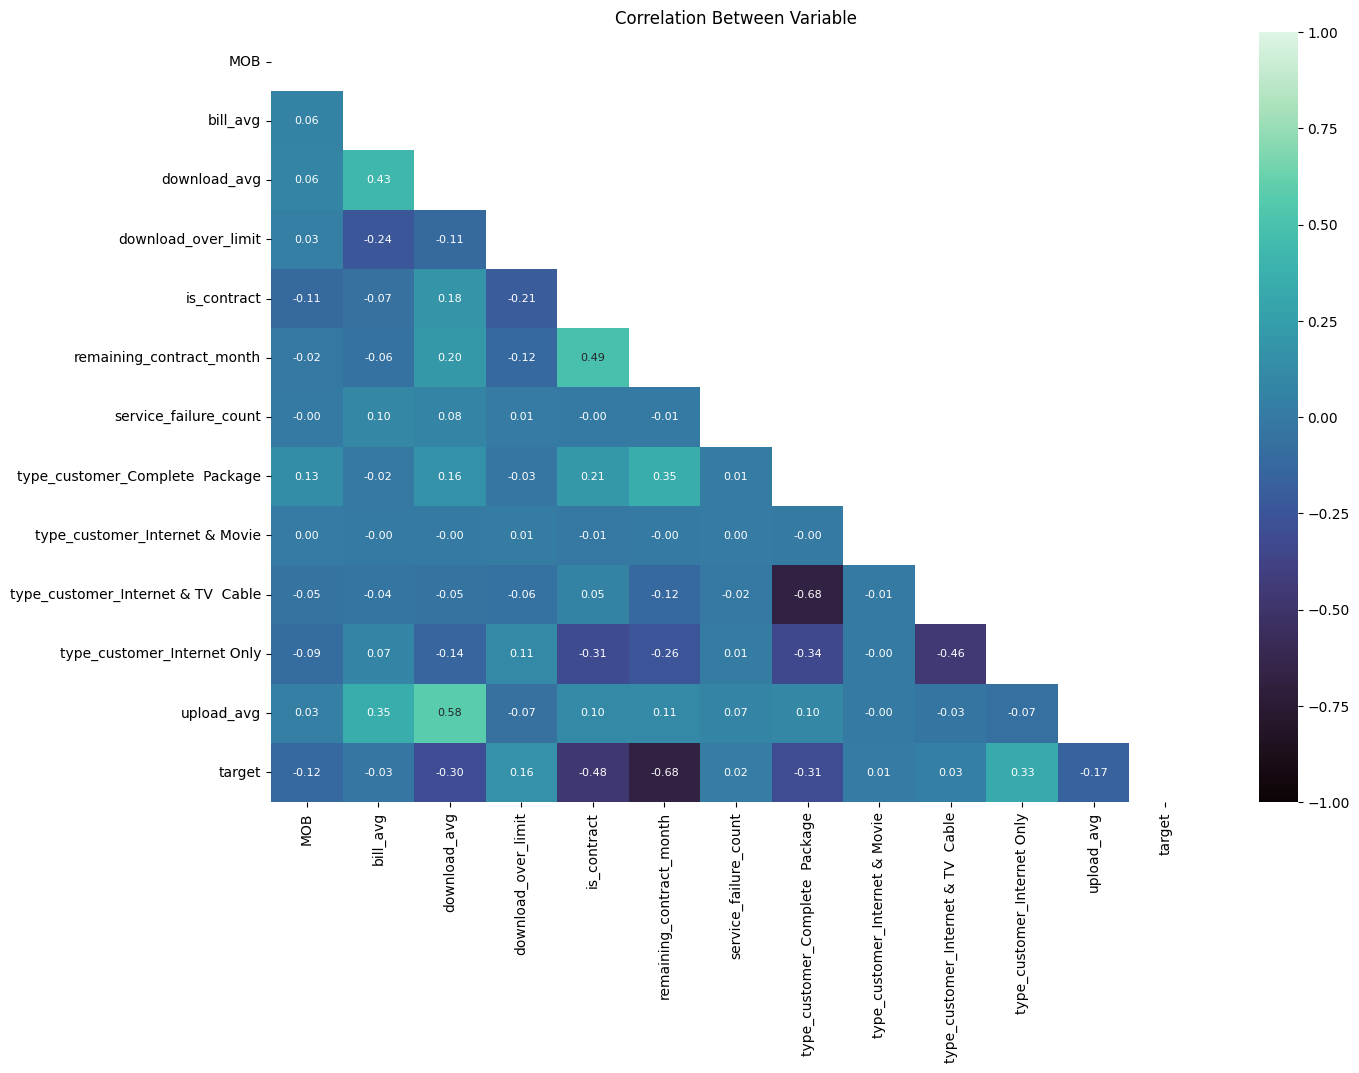

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

# To selecto only lower-triangle part of correlation matrix
mask = np.triu(np.ones_like(
    training[corr_column].corr() #variable ini yg perlu disesuaikan
    , dtype=np.bool))

sns.heatmap(
      training[corr_column].corr() #variable ini yg perlu disesuaikan
            ,vmin=-1,
            vmax=1,cmap='mako',annot=True,
            mask=mask,
            annot_kws={"fontsize":8}, fmt=",.2f")

plt.show()

In [ ]:
# Create correlation matrix
# corr_matrix = training.corr().abs()

corr_matrix = training.corr().abs()
corr_matrix


# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# upper


# # # to eliminate column have same behavior
# upper[(upper > 0.6)]

# # # Find features with correlation greater than 0.7, and add into to_drop list

#list comperhension
to_drop = [x for x in upper.columns if any(upper[x] > 0.7)]

<ipython-input-147-ab1ef5e1bc5b>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
to_drop

[]

In [ ]:
x_training = x_training.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)

<ipython-input-150-ff666997a607>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_training.corr(), dtype=np.bool))


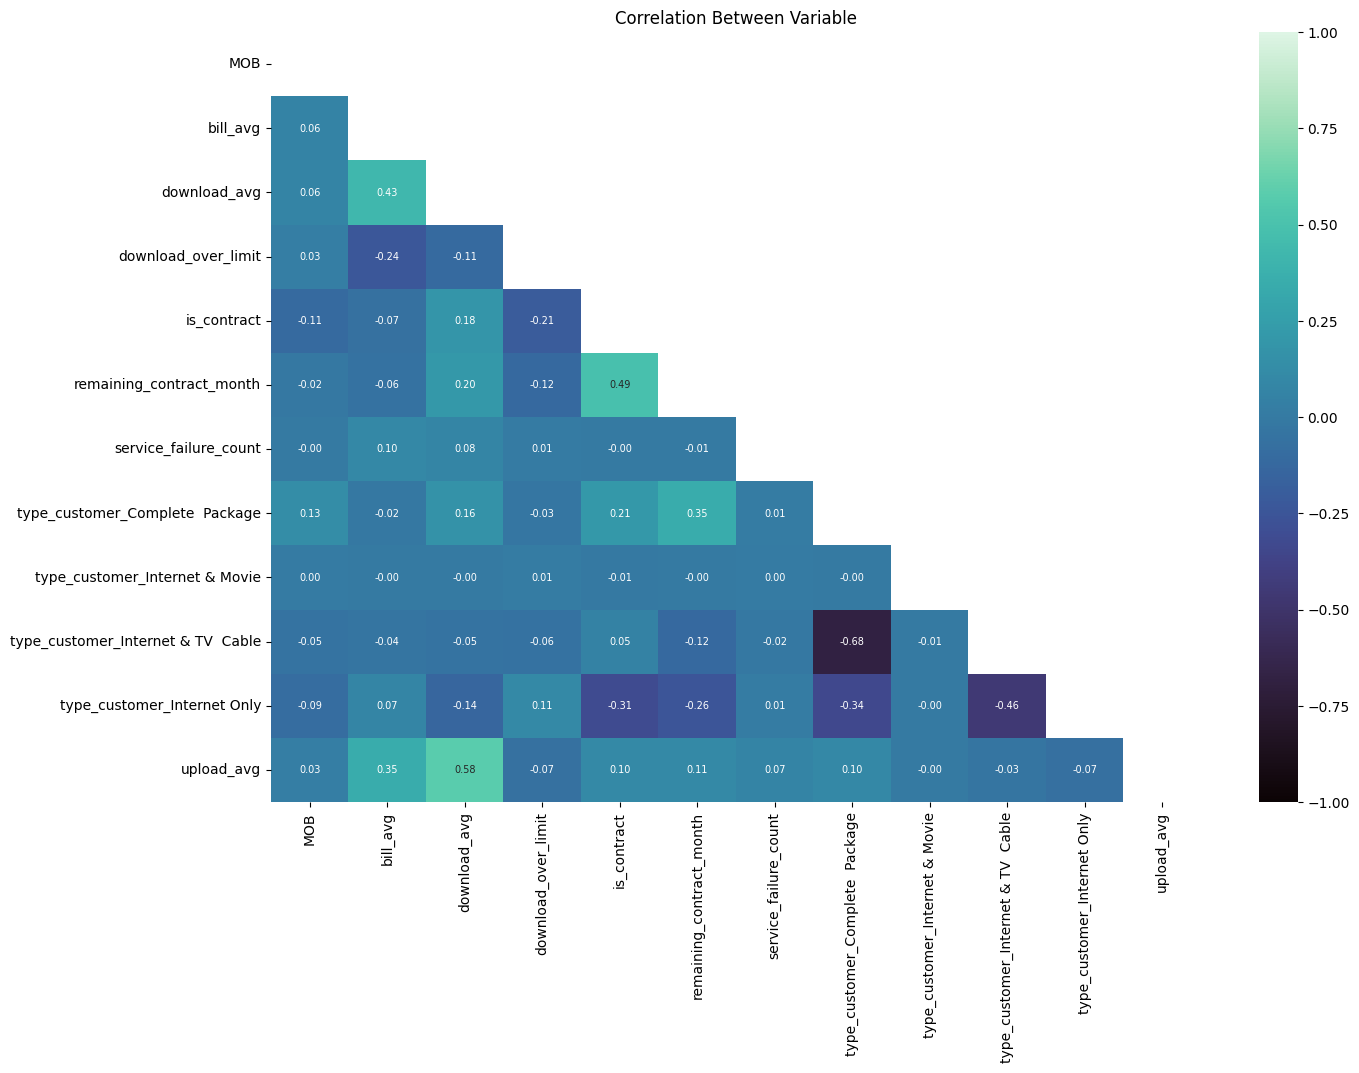

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

# To selecto only lower-triangle part of correlation matrix
mask = np.triu(np.ones_like(
    x_training.corr(), dtype=np.bool))

sns.heatmap(x_training.corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":7}, fmt=",.2f")

plt.show()

In [ ]:
x_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50325 entries, 1181621 to 1644401
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MOB                                 50325 non-null  float64
 1   bill_avg                            50325 non-null  float64
 2   download_avg                        50325 non-null  float64
 3   download_over_limit                 50325 non-null  float64
 4   is_contract                         50325 non-null  uint8  
 5   remaining_contract_month            50325 non-null  float64
 6   service_failure_count               50325 non-null  float64
 7   type_customer_Complete  Package     50325 non-null  uint8  
 8   type_customer_Internet & Movie      50325 non-null  uint8  
 9   type_customer_Internet & TV  Cable  50325 non-null  uint8  
 10  type_customer_Internet Only         50325 non-null  uint8  
 11  upload_avg                       

## 7. Model Training & Application to Test Set

### Fit Logistic Regression Model

In [ ]:
# Max_Iter : maximal berapa kali prediksi Logistic Regression diperbaiki
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_training, y_training)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

### Probability & Prediction of the Model

In [ ]:
# x_training2 = x_training.copy()
# x_training2['prediction'] = model.predict(x_training) # Prediksi apakah akan churn atau tidak
# x_training2[['prob_no','prob_yes']] = model.predict_proba(x_training) # Output probability/peluang untuk churn
# x_training2[['prob_yes','prediction']]


x_training2 = training.copy()
x_training2['prediction'] = model.predict(x_training)
x_training2[['prob_no','prob_yes']] = model.predict_proba(x_training)
x_training2[['prob_no','prob_yes','prediction','target']]

,prob_no,prob_yes,prediction,target
id,,,,
1181621,0.992552,0.007448,0,0
1009933,0.917750,0.082250,0,0
1643538,0.969730,0.030270,0,0
111134,0.011683,0.988317,1,1
1619263,0.798300,0.201700,0,0
...,...,...,...,...
1378195,0.438257,0.561743,1,1
440507,0.997427,0.002573,0,0
86961,0.028551,0.971449,1,1


In [ ]:
## Churn Average Probability
x_training2['prob_yes'].mean()

0.5339271857693058

In [ ]:
##Average Chun Probability Churner
average_prob_yes = x_training2.loc[x_training2['target'] == 1, 'prob_yes'].mean()
print("#Average Chun Probability Churner", average_prob_yes)

#Average Chun Probability Churner 0.8024054570534562


In [ ]:
#Avg Churn Probability non- Churner

In [ ]:
average_prob_no = x_training2.loc[x_training2['target'] == 0, 'prob_yes'].mean()
print("#Average Chun Probability Non Churner", average_prob_no)

#Average Chun Probability Non Churner 0.197499968050283


In [ ]:
x_test2 = test.copy()
x_test2['prediction'] = model.predict(x_test)
x_test2[['prob_no','prob_yes']] = model.predict_proba(x_test)
x_test2[['prob_no','prob_yes','prediction','target']]

,prob_no,prob_yes,prediction,target
id,,,,
1169849,0.877563,0.122437,0,0
857430,0.647697,0.352303,0,0
1508700,0.939709,0.060291,0,0
522146,0.195181,0.804819,1,1
265165,0.886221,0.113779,0,0
...,...,...,...,...
517925,0.071576,0.928424,1,1
903435,0.022022,0.977978,1,1
1365290,0.669950,0.330050,0,0


## 8. Model Evaluation

### Accuracy Test

In [ ]:
# Accuracy dr prediksi model dengan data training
model.score(x_training, y_training)

0.8826428216592151

In [ ]:
# Accuracy dr prediksi model dengan data test
model.score(x_test, y_test)

0.8831602373887241

### Confusion matrix
We can also check the confusion matrix using the confusion_matrix() report

In [ ]:
# train
# confusion_train = confusion_matrix(y_training, model.predict(x_training))
# confusion_train

confusion_train = confusion_matrix(y_training, model.predict(x_training))
confusion_train

array([[19235,  3101],
       [ 2805, 25184]])

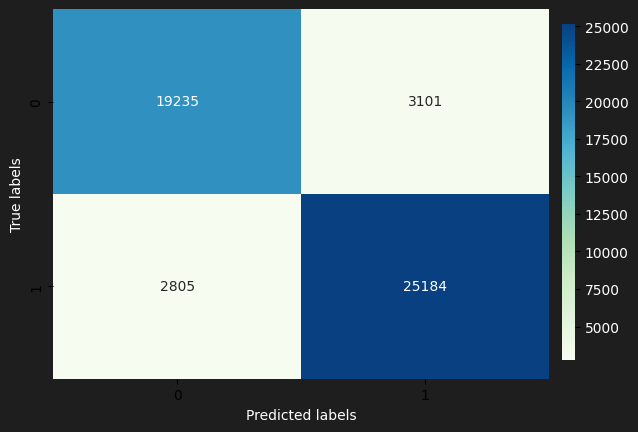

In [ ]:
##test
fig, ax = plt.subplots()
fig.patch.set_facecolor('#1e1e1e')  # Set the figure background color to black
ax.set_facecolor('#1e1e1e')         # Set the axis background color to black
# Create the heatmap with explicit colorbar axis
heatmap = sns.heatmap(confusion_train, annot=True, fmt='d', cmap='GnBu', cbar=True, ax=ax, cbar_ax=ax.figure.add_axes([0.92, 0.15, 0.02, 0.7]))
# Set labels
ax.set_xlabel('Predicted labels', color='white')
ax.set_ylabel('True labels', color='white')
cbar = heatmap.collections[0].colorbar
for label in cbar.ax.get_yticklabels():
    label.set_color('white')
plt.show()

In [ ]:
# test
confusion_test = confusion_matrix(y_test, model.predict(x_test))
confusion_test

array([[ 8194,  1313],
       [ 1207, 10854]])

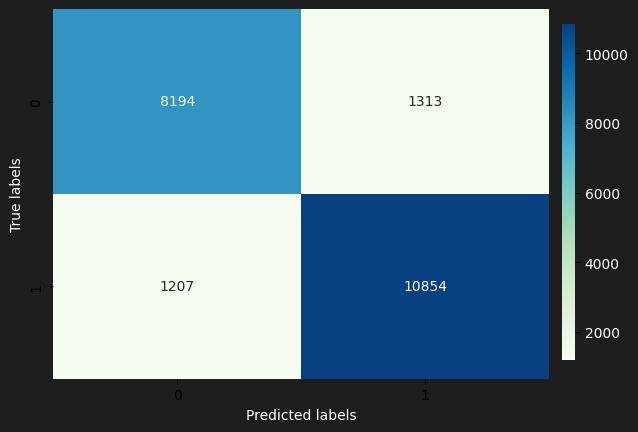

In [ ]:
##test
fig, ax = plt.subplots()
fig.patch.set_facecolor('#1e1e1e')  # Set the figure background color to black
ax.set_facecolor('#1e1e1e')         # Set the axis background color to black
# Create the heatmap with explicit colorbar axis
heatmap = sns.heatmap(confusion_test, annot=True, fmt='d', cmap='GnBu', cbar=True, ax=ax, cbar_ax=ax.figure.add_axes([0.92, 0.15, 0.02, 0.7]))
# Set labels
ax.set_xlabel('Predicted labels', color='white')
ax.set_ylabel('True labels', color='white')
cbar = heatmap.collections[0].colorbar
for label in cbar.ax.get_yticklabels():
    label.set_color('white')
plt.show()

## Clasification Report

In [ ]:
# Catatan: Kita harus bandingkan juga F1 Score antara training dan test
# Model yang baik seharusnya tidak jauh beda

In [ ]:
# Data training

print(classification_report(y_training, model.predict(x_training) ))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     22336
           1       0.89      0.90      0.90     27989

    accuracy                           0.88     50325
   macro avg       0.88      0.88      0.88     50325
weighted avg       0.88      0.88      0.88     50325



In [ ]:
# Data test
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      9507
           1       0.89      0.90      0.90     12061

    accuracy                           0.88     21568
   macro avg       0.88      0.88      0.88     21568
weighted avg       0.88      0.88      0.88     21568



### AUC-ROC Curve

In [ ]:
# Create score from model
y_train_score = model.predict_proba(x_training)[:,1]
y_test_score = model.predict_proba(x_test)[:,1]
# Create holder for the FPR, TPR, and AUC-ROC data

# Training
fpr_train = dict()
tpr_train = dict()
auc_roc_train = dict()

# Test
fpr_test = dict()
tpr_test = dict()
auc_roc_test = dict()

In [ ]:
# Compute micro-average ROC curve and ROC area

# Train
fpr_train["micro"], tpr_train["micro"], _ = roc_curve(y_training['target'], y_train_score.ravel())
auc_roc_train["micro"] = auc(fpr_train["micro"], tpr_train["micro"])

# Test
fpr_test["micro"], tpr_test["micro"], _ = roc_curve(y_test['target'], y_test_score.ravel())
auc_roc_test["micro"] = auc(fpr_test["micro"], tpr_test["micro"])

In [ ]:
auc_roc_train["micro"]

0.9340668835336559

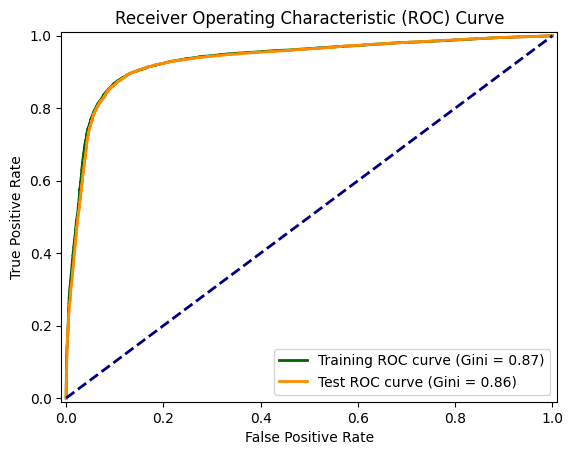

In [ ]:
# Create ROC-AUC Curve for training and test
plt.figure()
lw = 2
# Training
plt.plot(
    fpr_train["micro"],
    tpr_train["micro"],
    color = "darkgreen",
    lw=lw,
    label="Training ROC curve (Gini = %0.2f)" % (2*(auc_roc_train["micro"] - .5)),
)

# Testing
plt.plot(
    fpr_test["micro"],
    tpr_test["micro"],
    color = "darkorange",
    lw=lw,
    label="Test ROC curve (Gini = %0.2f)" % (2*(auc_roc_test["micro"] - .5)),
)
plt.plot([0,1],[0,1], color="navy", lw=lw, linestyle = '--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc = "lower right")
plt.show()

### Decile Performance
Can be used for next targeted marketing (Focus on Customer with high probability to churn)

In [ ]:
# Create a prediction table for training set
x_training3 = x_training.copy()
# x_training2['prediction'] = model.predict(x_training)
# x_training2[['prob_no','prob_takers']] = model.predict_proba(x_training)
# x_training2 = x_training2[['prob_takers','prediction']].copy()
# x_training2

x_training3['prediction'] = model.predict(x_training)
x_training3[['prob_no','prob_yes']] = model.predict_proba(x_training)
x_training3 = x_training3[['prob_yes','prediction']].copy()
x_training3 = x_training3.merge(y_training, how='inner', left_index=True, right_index=True)
x_training3

,prob_yes,prediction,target
id,,,
1181621,0.007448,0,0
1009933,0.082250,0,0
1643538,0.030270,0,0
111134,0.988317,1,1
1619263,0.201700,0,0
...,...,...,...
1378195,0.561743,1,1
440507,0.002573,0,0
86961,0.971449,1,1


In [ ]:
## Decile Performance

Q: Apakah benar ketika peluang churn itu semakin tinggi, memang semakin banyak orang yang  akan churn?

In [ ]:
# Create 10 decile
x_training3['binning'] = pd.qcut(x_training3['prob_yes'], q=10, precision=5)

# Create proposition table
df_prop = x_training3.drop(['prob_yes','prediction'], axis=1).value_counts().sort_index(ascending = False).reset_index()
df_prop = df_prop.pivot(index = 'binning', columns = 'target', values = 0).fillna(0)

df_prop['total_obs'] = df_prop.sum(axis=1)
df_prop['prob_yes'] = df_prop[1]/df_prop['total_obs']
n_good = df_prop[df_prop.columns[0]].sum(axis=0)
n_bad = df_prop[df_prop.columns[1]].sum(axis=0)
df_prop['pct_non_churn'] = df_prop[df_prop.columns[0]] / n_good
df_prop['pct_yes'] = df_prop[df_prop.columns[1]] / n_bad
df_prop['cumm_non_churn'] = df_prop['pct_non_churn'].cumsum()
df_prop['cumm_yes'] = df_prop['pct_yes'].cumsum()
df_prop = df_prop.rename(columns = {0: '#non-churn', 1: '#yes'})
df_prop

target,#non-churn,#yes,total_obs,prob_yes,pct_non_churn,pct_yes,cumm_non_churn,cumm_yes
binning,,,,,,,,
"(-1e-05, 0.017674]",4683,350,5033,0.069541,0.209662,0.012505,0.209662,0.012505
"(0.017674, 0.05876]",4595,437,5032,0.086844,0.205722,0.015613,0.415383,0.028118
"(0.05876, 0.15326]",4537,496,5033,0.098550,0.203125,0.017721,0.618508,0.045839
"(0.15326, 0.37816]",4142,890,5032,0.176868,0.185441,0.031798,0.803949,0.077638
"(0.37816, 0.66438]",2639,2394,5033,0.475661,0.118150,0.085534,0.922099,0.163171
"(0.66438, 0.80062]",902,4130,5032,0.820747,0.040383,0.147558,0.962482,0.310729
"(0.80062, 0.8712]",293,4739,5032,0.941773,0.013118,0.169317,0.975600,0.480046
"(0.8712, 0.92502]",296,4737,5033,0.941188,0.013252,0.169245,0.988852,0.649291
"(0.92502, 0.9719]",173,4859,5032,0.965620,0.007745,0.173604,0.996597,0.822895


## Kolmogorov-Smirnov Statistics (KS Statistics)

Used to see whether the score have power to distinguish between takers and non-takers

KS benchmark-nya adalah 40

In [ ]:
ks_statistics  = 100*(df_prop['cumm_non_churn'] - df_prop['cumm_yes']).max()
ks_statistics

75.89276080216123

<ipython-input-232-082213254e38>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(training[corr_column].corr(), dtype=np.bool))


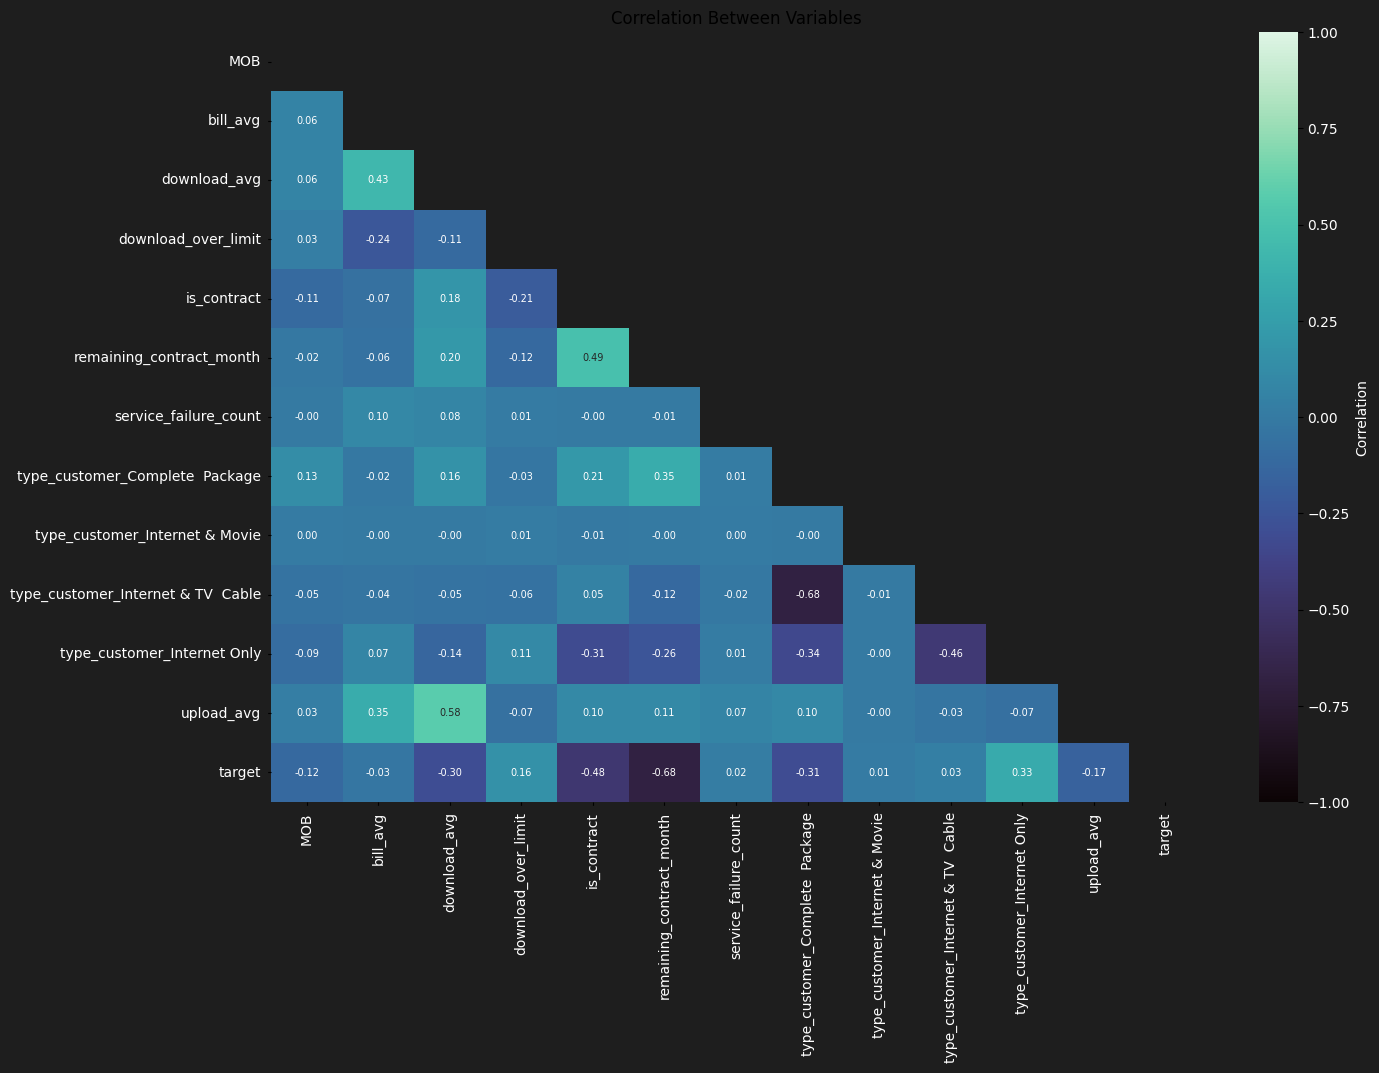

In [ ]:
# corr with background gelap
fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('#1e1e1e')  # Set the figure background color to black

# Create the axes after setting the background color for the figure
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#1e1e1e')  # Set the axis background color to black
ax.set_title('Correlation Between Variables')

# To select only the lower-triangle part of the correlation matrix
mask = np.triu(np.ones_like(training[corr_column].corr(), dtype=np.bool))

# Set the background color of the entire plot
ax.set_facecolor('#1e1e1e')  # Set to black

heatmap = sns.heatmap(
    training[corr_column].corr(),
    vmin=-1,
    vmax=1,
    cmap='mako',
    annot=True,
    mask=mask,
    annot_kws={"fontsize": 7},
    fmt=",.2f",
    cbar_kws={"label": "Correlation"}
)

# Set the background color of the column and row names to black
heatmap.set_xticklabels(heatmap.get_xticklabels(), backgroundcolor='#1e1e1e', color='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), backgroundcolor='#1e1e1e', color='white')

# Set the color of the colorbar label to white
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.label.set_color('white')

# Set the color of the colorbar tick labels to white
for label in cbar.ax.get_yticklabels():
    label.set_color('white')

plt.show()